In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, normalize
from scipy import stats
from IPython.display import HTML
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('attacks.csv')
df2 = df
df.head()

,src_ipv4,src_ipv6,src_mac,src_port,dest_port,duration,os,packet_size,tcp,udp,http,https,ssh,smtp,pop3,ftp,icmp,syn,ack,fin,psh,urg,ece,cwr,attack_type
0,144.46.175.132,cb5c:4734:5940:541f:9922:18b9:bacc:d288,81:48:99:10:80:c4,42199,41731,973309,windows,27977,f,t,f,t,f,t,f,t,f,t,f,f,t,f,f,f,DoS
1,218.156.185.187,94bb:5302:ce9a:ad29:d730:f895:c423:a935,4c:0c:56:13:35:dd,22773,21570,879523,macos,130825,f,t,t,t,t,f,t,f,f,f,t,f,t,f,t,f,Phishing
2,147.225.24.241,5886:8686:ad33:c5f2:d0a9:458:25e6:8f7b,56:8c:58:ae:54:3f,29656,16287,122040,windows,555253,t,t,f,t,t,t,f,t,t,f,t,f,f,f,f,t,DDoS
3,205.44.151.19,6d8a:cca0:b22a:13ea:5ace:162d:190d:f184,fa:4d:a4:fa:e6:1f,21294,42000,57818,chrome os,930746,t,f,f,f,t,t,t,f,t,t,t,t,t,f,f,t,Phishing
4,150.158.113.97,f044:b945:4a93:1aee:67ae:2628:a82a:de17,d0:5f:1c:6f:ba:46,16425,6092,14124,windows,882800,t,t,t,f,t,f,t,f,f,t,f,t,f,f,t,f,DoS


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   src_ipv4     800000 non-null  object
 1   src_ipv6     800000 non-null  object
 2   src_mac      800000 non-null  object
 3   src_port     800000 non-null  int64 
 4   dest_port    800000 non-null  int64 
 5   duration     800000 non-null  int64 
 6   os           800000 non-null  object
 7   packet_size  800000 non-null  int64 
 8   tcp          800000 non-null  object
 9   udp          800000 non-null  object
 10  http         800000 non-null  object
 11  https        800000 non-null  object
 12  ssh          800000 non-null  object
 13  smtp         800000 non-null  object
 14  pop3         800000 non-null  object
 15  ftp          800000 non-null  object
 16  icmp         800000 non-null  object
 17  syn          800000 non-null  object
 18  ack          800000 non-null  object
 19  fi

In [4]:
df.describe()

,src_port,dest_port,duration,packet_size
count,800000.000000,800000.00000,8.000000e+05,8.000000e+05
mean,32780.646821,32775.47324,5.241233e+05,5.241068e+05
std,18915.455978,18923.18738,3.026008e+05,3.030320e+05
min,0.000000,0.00000,3.000000e+00,3.000000e+00
25%,16432.750000,16371.00000,2.623248e+05,2.613102e+05
50%,32796.000000,32792.00000,5.236865e+05,5.240365e+05
75%,49147.000000,49148.00000,7.862242e+05,7.865182e+05
max,65535.000000,65535.00000,1.048575e+06,1.048575e+06


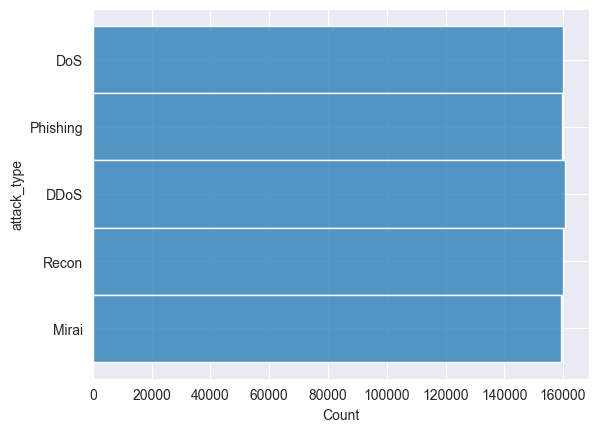

In [5]:
sns.histplot(data=df,y="attack_type")
plt.show()

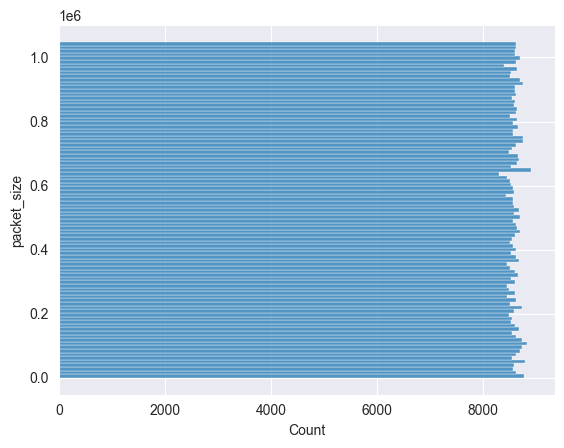

In [6]:
sns.histplot(data=df,y="packet_size")
plt.show()

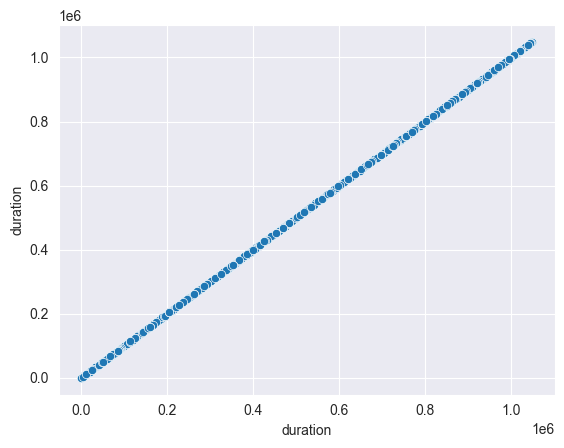

In [7]:
sns.scatterplot(df,x='duration',y='duration')
plt.show()

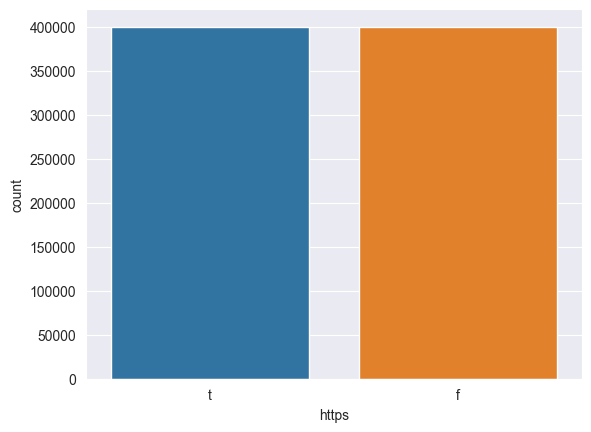

In [8]:
sns.countplot(df, x="https", hue = 'https')
plt.show()

In [9]:
df2 = df2.dropna()
label = LabelEncoder()
for x in df:
    if df[x].dtype == 'object':
        df2[x] = label.fit_transform(df2[x])

In [10]:
print(df2.size)
df2.drop_duplicates(inplace=True)
print(df2.size)

20000000
20000000


In [11]:
X = df2.drop(columns=['attack_type',"src_ipv4","src_ipv6","src_mac","src_port","dest_port","os"])
print(X.columns)
y = df2["attack_type"]

Index(['duration', 'packet_size', 'tcp', 'udp', 'http', 'https', 'ssh', 'smtp',
       'pop3', 'ftp', 'icmp', 'syn', 'ack', 'fin', 'psh', 'urg', 'ece', 'cwr'],
      dtype='object')


In [12]:
norm_X = (X-X.min())/(X.max()-X.min())

In [13]:
norm_X.head()

,duration,packet_size,tcp,udp,http,https,ssh,smtp,pop3,ftp,icmp,syn,ack,fin,psh,urg,ece,cwr
0,0.928220,0.026678,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.838779,0.124762,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.116384,0.529530,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.055137,0.887629,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.013467,0.841904,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


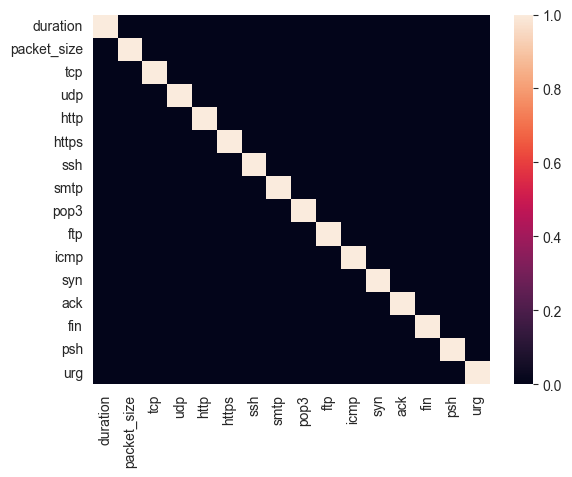

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
newPCA = pca.fit_transform(norm_X)
newPCAC = pd.DataFrame(newPCA,columns=norm_X.columns.tolist()[:16]).corr()
sns.heatmap(newPCAC)
plt.show()

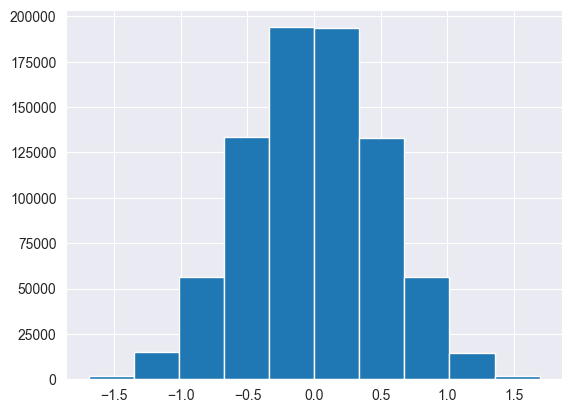

In [15]:
plt.hist(newPCA[:,0])
plt.show()

In [16]:
from sklearn.preprocessing import KBinsDiscretizer

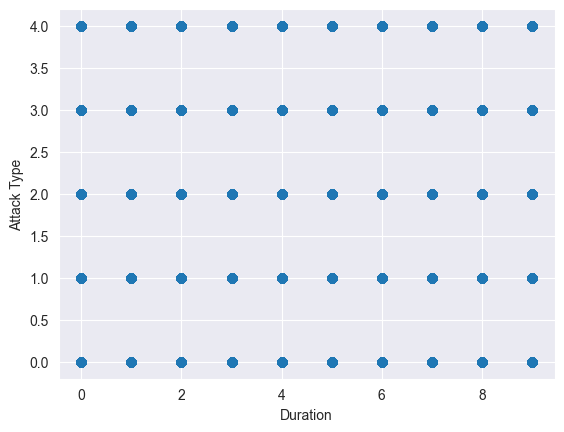

In [17]:
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
newEst = est.fit_transform(norm_X)
plt.scatter(newEst[:,0],y)
plt.xlabel("Duration")
plt.ylabel("Attack Type")
plt.show()

In [18]:
from sklearn.feature_selection import chi2

In [19]:
chi2_stat, p_values = chi2(norm_X,y)
print(chi2_stat,p_values)
chiCorr = norm_X.corr()

[0.67412954 1.73508148 0.83094957 2.47559987 4.6526383  0.55370871
 1.52408221 0.51697316 2.69879041 0.7777851  4.21271231 3.88575976
 0.54307403 2.34195187 2.46989369 1.29177291 2.12142489 1.59593349] [0.95448053 0.7843356  0.93425134 0.64901028 0.32483016 0.96806617
 0.82236722 0.97182774 0.60942629 0.94140123 0.37798311 0.4216873
 0.9691745  0.6731419  0.65003479 0.86276983 0.71343733 0.80952283]


18 18


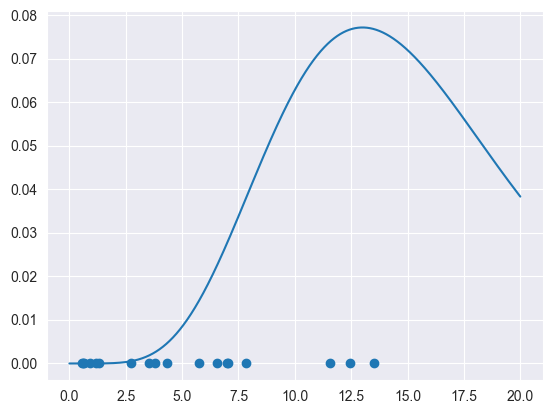

In [20]:
from scipy.stats import chi2
x = np.arange(0, 20, 0.001)
arrs = [0] * 18
print(len(arrs),len(p_values))
#plot Chi-square distribution with 4 degrees of freedom
points = []
for i in range(len(p_values)):
    points += [20*(1-p_values[i])]
plt.plot(x, chi2.pdf(x, df=15))
plt.scatter(points,arrs)
plt.show()

# Milestone 3

### We will be using the normalized data created in milestone 1 for the analysis

In [21]:
norm_X.head() #display the normalized code

,duration,packet_size,tcp,udp,http,https,ssh,smtp,pop3,ftp,icmp,syn,ack,fin,psh,urg,ece,cwr
0,0.928220,0.026678,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.838779,0.124762,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.116384,0.529530,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.055137,0.887629,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.013467,0.841904,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [22]:
print(y)

0         1
1         3
2         0
3         3
4         1
         ..
799995    3
799996    1
799997    3
799998    2
799999    1
Name: attack_type, Length: 800000, dtype: int32


# Training and Testing data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42) #split the data into training and testing data

## First Model: Naive Bayes -> GaussianNB

In [24]:
from sklearn.naive_bayes import GaussianNB # first model
mld1 = GaussianNB()
mld1.fit(X_train, y_train) # fit the model to the data after initializing it.

GaussianNB()

In [25]:
print(f"Mean Accuracy: {mld1.score(X_test, y_test)}")
acur1 = mld1.score(X_test, y_test) # score for the model

Mean Accuracy: 0.20105


In [26]:
preds3 = mld1.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, preds3, multi_class='ovr') # AUC function
print(f"AUC: {roc_auc}")

AUC: 0.5005192030383745


In [27]:
predClass3 = mld1.predict(X_test)
print(classification_report(y_test, predClass3)) #prints the total classfication report

              precision    recall  f1-score   support

           0       0.20      0.36      0.26     48303
           1       0.20      0.31      0.25     48210
           2       0.20      0.01      0.02     47759
           3       0.20      0.22      0.21     47772
           4       0.20      0.10      0.13     47956

    accuracy                           0.20    240000
   macro avg       0.20      0.20      0.17    240000
weighted avg       0.20      0.20      0.17    240000



## Second Model: Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
mld3 = DecisionTreeClassifier(random_state=2)
mld3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

In [29]:
print(f"Mean Accuracy: {mld3.score(X_test, y_test)}")
acur2 = mld3.score(X_test, y_test)

Mean Accuracy: 0.1994


In [30]:
preds2 = mld3.predict_proba(X_test)
roc_auc2 = roc_auc_score(y_test, preds2, multi_class='ovr')
print(f"AUC: {roc_auc2}")

AUC: 0.499625158063536


In [31]:
predClass2 = mld3.predict(X_test)
print(classification_report(y_test, predClass2))

              precision    recall  f1-score   support

           0       0.20      0.20      0.20     48303
           1       0.20      0.20      0.20     48210
           2       0.20      0.20      0.20     47759
           3       0.20      0.20      0.20     47772
           4       0.20      0.20      0.20     47956

    accuracy                           0.20    240000
   macro avg       0.20      0.20      0.20    240000
weighted avg       0.20      0.20      0.20    240000



## Third Model: RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(f"Mean Accuracy {clf.score(X_test, y_test)}")
acur3 = clf.score(X_test, y_test)

Mean Accuracy 0.20127083333333334


In [33]:
preds = clf.predict_proba(X_test)
roc_auc3 = roc_auc_score(y_test, preds, multi_class='ovr')
print(f"AUC: {roc_auc3}")

AUC: 0.4998453005085047


In [34]:
predClass = clf.predict(X_test)
print(classification_report(y_test, predClass))

              precision    recall  f1-score   support

           0       0.20      0.79      0.32     48303
           1       0.20      0.02      0.04     48210
           2       0.23      0.01      0.02     47759
           3       0.20      0.06      0.09     47772
           4       0.20      0.13      0.16     47956

    accuracy                           0.20    240000
   macro avg       0.20      0.20      0.12    240000
weighted avg       0.20      0.20      0.12    240000



# Deep Learning Algorithms

## First Model: MLP Classifier

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
Nmld = MLPClassifier()
Nmld.fit(X_train, y_train)
print(f"Mean Accuracy: {Nmld.score(X_test, y_test)}")
acur4 = Nmld.score(X_test, y_test)

Mean Accuracy: 0.2012625


In [37]:
predsN = Nmld.predict_proba(X_test)
print(f"AUC: {roc_auc_score(y_test, predsN, multi_class='ovr')}")
roc_auc4 = roc_auc_score(y_test, predsN, multi_class='ovr')

AUC: 0.5000031278181402


In [38]:
predClassN = Nmld.predict(X_test)
print(classification_report(y_test, predClassN, zero_division=0))

              precision    recall  f1-score   support

           0       0.20      1.00      0.34     48303
           1       0.00      0.00      0.00     48210
           2       0.00      0.00      0.00     47759
           3       0.00      0.00      0.00     47772
           4       0.00      0.00      0.00     47956

    accuracy                           0.20    240000
   macro avg       0.04      0.20      0.07    240000
weighted avg       0.04      0.20      0.07    240000



## Second Model: Artificial Neural Network

In [39]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [40]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [41]:
ann.fit(X_train,y_train,batch_size=32,epochs = 10)

Epoch 1/10
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 10s 543us/step - accuracy: 0.2007 - loss: -13314267136.0000
Epoch 2/10
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 9s 530us/step - accuracy: 0.1991 - loss: -306776408064.0000
Epoch 3/10
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 9s 523us/step - accuracy: 0.1996 - loss: -1382253985792.0000
Epoch 4/10
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 10s 550us/step - accuracy: 0.1986 - loss: -3699656884224.0000
Epoch 5/10
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 10s 582us/step - accuracy: 0.1993 - loss: -7781481971712.0000
Epoch 6/10
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 10s 572us/step - accuracy: 0.2004 - loss: -13981084286976.0000
Epoch 7/10
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 10s 584us/step - accuracy: 0.1995 - loss: -22925700759552.0000
Epoch 8/10
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 10s 579us/step - accuracy: 0.1990 - loss: -34894057046016.0000
Epoch 9/10
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 11s 604us/step - accuracy: 0.2000 - loss: -50350048411648.0000
Epoch 10/10
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 10

In [42]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (32, 6)                │           114 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 6)                │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 1)                │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 328 (1.29 KB)

In [43]:
ann.get_metrics_result()
acur5 = ann.get_metrics_result()['accuracy']
roc_auc5 = acur5
print(roc_auc5)

0.19967857003211975


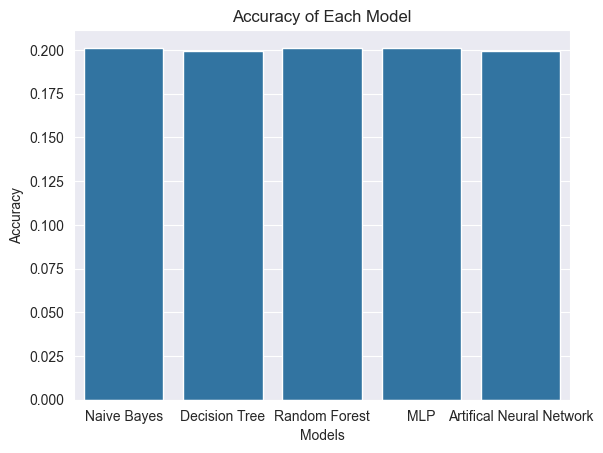

In [44]:
barArr = np.array([acur1,acur2,acur3,acur4,acur5])
barNames = ['Naive Bayes',"Decision Tree","Random Forest","MLP","Artifical Neural Network"]
sns.barplot(x=barNames,y=barArr)
plt.title("Accuracy of Each Model")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

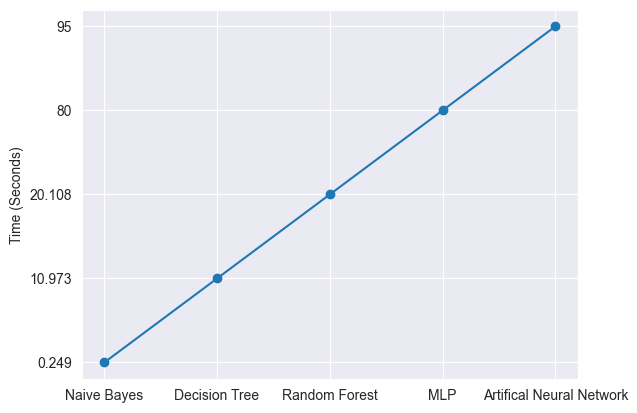

In [45]:
TimeArr = np.array([["Naive Bayes",.249],["Decision Tree",10.973],["Random Forest",20.108],["MLP",80],["Artifical Neural Network",95]])
plt.ylabel("Time (Seconds)")
plt.plot(TimeArr[:,0],TimeArr[:,1],marker='o')
plt.show()